In [1]:
import pandas as pd
path = "//home/font/Data/MM/JiNan/"
ppd_list = 'finalData.csv'
df_lcis = pd.read_csv((path+ppd_list))

df_lcis2 = df_lcis.drop(['Q19_请问您的主要职业或者毕业之后将要成为的主要职业是什么'],axis=1)


df_lcis2['Score'] = 0
df_lcis2['Score'].loc[df_lcis['score']  == 3] = 1

df_lcis2['Score'].loc[df_lcis['score']  == 4] = 1
df_lcis2['Score'].loc[df_lcis['score']  == 5] = 1 

df_lcis2['个人月收入'] = 0
df_lcis2['个人月收入'].loc[df_lcis['Q4_个人月收入']  == '2001-3000元'] = 1 
df_lcis2['个人月收入'].loc[df_lcis['Q4_个人月收入']  == '3001-5000元'] = 2
df_lcis2['个人月收入'].loc[df_lcis['Q4_个人月收入']  == '5001-8000元'] = 3 
df_lcis2['个人月收入'].loc[df_lcis['Q4_个人月收入']  == '8001-12000元'] = 4 
df_lcis2['个人月收入'].loc[df_lcis['Q4_个人月收入']  == '12001-20000元'] = 5 
df_lcis2['个人月收入'].loc[df_lcis['Q4_个人月收入']  == '20000元以上'] = 6 

df_lcis2 = df_lcis2.drop(['score','Q4_个人月收入','个人月收入','工作年限','sex','province','city'],axis=1)

import numpy as np
from sklearn import preprocessing
X_train = np.array(df_lcis2.drop(["Score"], axis=1).values)
y_train = np.array(df_lcis2["Score"].values)
X_train = preprocessing.scale(X_train)
df_lcis2.columns

/home/font/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/font/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/font/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/font/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/font/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size

Index(['基础设施建设', '生态环境', '治安环境', '产业发展', '企业条件', '职业发展', '收入水平', '住房条件',
       '户籍政策', '配偶就业', '子女教育', '生活成本', '交通状态', '休闲娱乐', 'Score'],
      dtype='object')

Feature ranking:
1. feature 10 (0.114662)
2. feature 0 (0.106343)
3. feature 8 (0.088986)
4. feature 13 (0.087977)
5. feature 2 (0.085400)
6. feature 9 (0.077190)
7. feature 1 (0.068647)
8. feature 3 (0.065366)
9. feature 12 (0.058661)
10. feature 6 (0.058611)
11. feature 4 (0.057388)
12. feature 7 (0.051167)
13. feature 5 (0.044405)
14. feature 11 (0.035198)
0.07142857142857142
Feature ranking:
1. feature 5 (0.093722)
2. feature 0 (0.093492)
3. feature 10 (0.086301)
4. feature 8 (0.082490)
5. feature 7 (0.076896)
6. feature 9 (0.074755)
7. feature 13 (0.074596)
8. feature 1 (0.070893)
9. feature 3 (0.070112)
10. feature 2 (0.069110)
11. feature 12 (0.063942)
12. feature 6 (0.063529)
13. feature 4 (0.043147)
14. feature 11 (0.037014)
0.07142857142857141


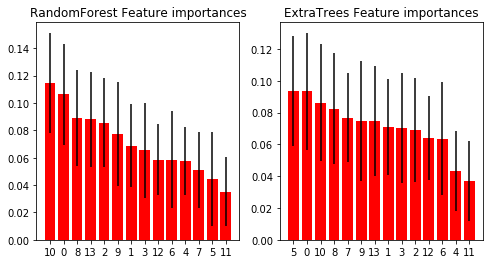

In [12]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
estimators = [("RandomForest", RandomForestClassifier(random_state=0)),
              ("ExtraTrees", ExtraTreesClassifier(random_state=100)), ]

n_estimators = len(estimators)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)

for n, (name, estimator) in enumerate(estimators):
    estimator.fit(X_train, y_train)
    importances = estimator.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        
    print(np.mean(importances))

    # Plot the feature importances of the forest
    plt.subplot(1, n_estimators, n + 1)
    plt.title(name + " Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])

plt.show()

In [13]:
from sklearn import model_selection,linear_model
from sklearn.feature_selection import RFECV
estimator = linear_model.LogisticRegression()
selector = RFECV(estimator=estimator, cv=10)
selector.fit(X_train, y_train)
print("N_features %s" % selector.n_features_)
print("Support is %s" % selector.support_)
print("Ranking %s" % selector.ranking_)
print("Grid Scores %s" % selector.grid_scores_)

N_features 5
Support is [ True False False  True  True False False  True  True False False False
 False False]
Ranking [ 1  9  8  1  1  6 10  1  1  3  2  7  5  4]
Grid Scores [0.77055138 0.78507519 0.76454887 0.78557644 0.79057644 0.77981203
 0.77478697 0.77978697 0.77978697 0.78454887 0.77978697 0.77978697
 0.78005013 0.78005013]
